In [1]:
import sqlalchemy as sql
import pandas as pd
import datetime

from ipynb.fs.full.help_functions import query_data

pd.set_option("display.max.columns", None)
%matplotlib inline
db_connect = query_data()
engine = sql.create_engine(db_connect)

pd.set_option('mode.chained_assignment',None)

In [2]:
import pandas as pd
import numpy as np
from math import pi
from bokeh.plotting import figure, output_notebook, show
from bokeh.palettes import Spectral8, Spectral5, Category20c
from bokeh.layouts import row, column
from bokeh.transform import dodge, cumsum, factor_cmap
from bokeh.models import ColumnDataSource, FactorRange, HoverTool
import math
import matplotlib.pyplot as plt

from help_functions import *

In [3]:
connection = engine.connect()
metadata = sql.MetaData()
oblamatik = sql.Table('oblamatik', metadata, autoload=True, autoload_with=engine)
query = sql.select(oblamatik).order_by('tstamp')
ResultSet = connection.execute(query).fetchall()
data_oblamatik = pd.DataFrame(ResultSet)
data_oblamatik.columns = ResultSet[0].keys()
data_oblamatik.drop(columns='id_col', inplace=True)
data_oblamatik.set_index('tstamp', inplace=True)
original_entries = data_oblamatik.shape[0]

In [4]:
data_oblamatik.index = data_oblamatik.index.floor('1min')
data_oblamatik.rename(columns={"Energiemessung HV2.UG bezogen": "E_Bezug_EW_kWh", 
                               "Energiemessung HV2.UG geliefert": "E_HauptVerteilung_Einspeisung_kWh"}, inplace=True)
data_oblamatik.head()

,Anergie_Kälte_kW,Anergie_Kälte_kWh,Anergie_Wärme_kW,Anergie_Wärme_kWh,Betriebsmodus,Bo_Heizen_Ein,Bo_Kühlen_Ein,E_Allgemein_kW,E_Allgemein_kWh,E_EG_1_kW,E_EG_1_kWh,E_EG_2_kW,E_EG_2_kWh,E_EG_3_kW,E_EG_3_kWh,E_HauptVerteilung_Einspeisung_kW,E_HauptVerteilung_kW,E_HauptVerteilung_kWh,E_Lüftung_kW,E_Lüftung_kWh,E_MSRL_kW,E_MSRL_kWh,E_Netzbezug_kW,E_Netzbezug_kWh,E_OG1_1_kW,E_OG1_1_kWh,E_OG1_2_kW,E_OG1_2_kWh,E_OG1_3_kW,E_OG1_3_kWh,E_OG2_kW,E_OG2_kWh,E_PVT_kW,E_PVT_kWh,E_Pumpe_Fund_kW,E_Pumpe_Fund_kWh,E_Pumpe_Heizung_Lüftung_kW,E_Pumpe_Heizung_Lüftung_kWh,E_Pumpe_Notkühlung_kW,E_Pumpe_Notkühlung_kWh,E_Pumpe_PVT_kW,E_Pumpe_PVT_kWh,E_Pumpe_Rückkühlung_kW,E_Pumpe_Rückkühlung_kWh,E_Stab_Speicher_kW,E_Stab_Speicher_kWh,E_Technikraum_kW,E_Technikraum_kWh,E_USV_kW,E_USV_kWh,E_WP1_kW,E_WP1_kWh,E_WP2_kW,E_WP2_kWh,E_Bezug_EW_kWh,E_HauptVerteilung_Einspeisung_kWh,Fund_KälteReg_kW,Fund_KälteReg_kWh,Fund_WärmeReg_TRL,Fund_WärmeReg_TVL,Fund_WärmeReg_Vol,Fund_WärmeReg_kW,Fund_WärmeReg_kWh,Gastro_Abw_kW,Gastro_Abw_kWh,Globalstrahlung,Heizen_Anergie_Ein,Heizen_Fund_Ein,Heizung_Deckensegel_FBH_kW,Heizung_Deckensegel_FBH_kWh,Heizung_Lüftung_kW,Heizung_Lüftung_kWh,Heizung_Status,Kühlen_Anergie_Ein,Kühlen_FreeCool_Fund_Ein,Kühlen_Fund_Ein,Kühlung_Deckensegel_FBH_kW,Kühlung_Deckensegel_FBH_kWh,Kühlung_Lüftung_kW,Kühlung_Lüftung_kWh,Kühlung_Server_kW,Kühlung_Server_kWh,Kühlung_Status,Notkühlung_Gastro_kW,Notkühlung_Gastro_kWh,PVT_BWW_Ein,PVT_BWW_TRL,PVT_BWW_TVL,PVT_BWW_Vol,PVT_BWW_kW,PVT_BWW_kWh,PVT_Heizung_Ein,PVT_KälteReg_Ein,PVT_Kühlung_Ein,PVT_Kühlung_Fund_kW,PVT_Kühlung_Fund_kWh,PVT_WärmeReg_Ein,PVT_Wärme_Fund_TRL,PVT_Wärme_Fund_TVL,PVT_Wärme_Fund_Vol,PVT_Wärme_Fund_kW,PVT_Wärme_Fund_kWh,T_Erdreich_201,T_Erdreich_203,T_Erdreich_205,T_Erdreich_301,T_Erdreich_303,T_Erdreich_305,T_Erdreich_401_ung,T_Erdreich_403_ung,T_Erdreich_405_ung,T_Fund_11,T_Fund_12,T_Fund_13,T_Fund_14,T_Fund_21,T_Fund_22,T_Fund_23,T_Fund_24,T_Fund_31,T_Fund_32,T_Fund_33,T_Fund_34,T_Lagerraum_Mitte,T_Lagerraum_Nord,T_Lagerraum_Süd,T_PVT_1,T_PVT_2,T_PVT_3,T_Raumsoll,T_amb,T_amb24h,WP1_Kond_BWW_TRL,WP1_Kond_BWW_TVL,WP1_Kond_BWW_Vol,WP1_Kond_BWW_kW,WP1_Kond_BWW_kWh,WP1_Kond_TRL,WP1_Kond_TVL,WP1_Kond_Tin,WP1_Kond_Tout,WP1_Kond_Vol,WP1_Kond_kW,WP1_Kond_kWh,WP1_Status,WP1_Verd_TRL,WP1_Verd_TVL,WP1_Verd_Vol,WP1_Verd_kW,WP1_Verd_kWh,WP2_Kond_TRL,WP2_Kond_TVL,WP2_Kond_Vol,WP2_Kond_kW,WP2_Kond_kWh,WP2_Status,WP2_Verd_TRL,WP2_Verd_TVL,WP2_Verd_Vol,WP2_Verd_kW,WP2_Verd_kWh,WRG_Speicher_TRL,WRG_Speicher_TVL,WRG_Speicher_Vol,WRG_Speicher_kW,WRG_Speicher_kW_neg,WRG_Speicher_kWh
tstamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-04 00:00:00,-1.6,1194.0,0.0,4237.0,0.0,False,True,26.042000,306800.62500,8.989,76851.648438,0.095,18151.929688,1.008,9123.269531,0.0,45.970001,380576.28125,0.045,20436.0,3.284,91671.570312,2.682,9633.950195,0.507,3303.610107,3.726,33570.421875,0.0,0.0,0.393,10702.089844,0.0,0.0,0.0,1.6,0.5,1336.0,0.0,5857.6,0.9,5851.7,0.1,1443.8,0.0,14564.3,2.190,-2.347703e+09,2.715,24241.650391,25.836,88932.273438,15.435,37600.238281,NaN,NaN,0.0,52610.0,30.1,31.6,22.1,38.6,88171.0,0.0,0.0,0.0,0.0,0.0,0.0,188688.0,0.0,46040.0,0.0,0.0,0.0,0.0,49.5,94957.0,0.0,19298.0,3.1,23330.0,10.0,3.3,8918.0,0.0,26.3,25.9,0.4,-0.2,7665.0,0.0,10.0,10.0,0.0,6537.0,0.0,20.5,33.3,2.7,37.0,48423.0,21.4,16.1,13.2,21.2,15.8,13.4,12.2,11.6,11.3,28.0,27.7,28.3,28.8,28.1,28.1,27.8,22.1,28.3,28.3,27.9,28.2,24.3,24.5,25.0,23.6,17.3,15.6,0.0,20.6,21.1,33.4,33.2,0.0,0.0,32904.0,34.8,43.2,35.6,44.5,8.7,83.9,160626.0,10.0,20.2,15.8,13.8,-69.8,351.0,27.8,29.2,0.0,0.0,163266.0,0.0,23.7,21.9,0.0,0.0,414.0,NaN,NaN,NaN,14.1,0.0,72106.0
2020-07-04 00:01:00,-1.6,1194.0,-2.4,4237.0,0.0,False,True,32.348999,306801.06250,8.865,76851.812500,0.061,18151.929688,0.915,9123.290039,0.0,50.998001,380577.03125,0.045,20436.0,3.756,91671.632812,2.682,9633.950195,0.502,3303.620117,2.495,33570.460938,0.0,0.0,0.4

In [5]:
data_oblamatik.drop(axis=0, index=data_oblamatik.index[data_oblamatik.index.duplicated()], inplace=True)

In [6]:
pd.set_option('display.max_rows', None)
data_oblamatik.memory_usage(deep=True)

Index                                 5114184
Anergie_Kälte_kW                      5114184
Anergie_Kälte_kWh                     5114184
Anergie_Wärme_kW                      5114184
Anergie_Wärme_kWh                     5114184
Betriebsmodus                         5114184
Bo_Heizen_Ein                        21831864
Bo_Kühlen_Ein                        21549428
E_Allgemein_kW                        5114184
E_Allgemein_kWh                       5114184
E_EG_1_kW                             5114184
E_EG_1_kWh                            5114184
E_EG_2_kW                             5114184
E_EG_2_kWh                            5114184
E_EG_3_kW                             5114184
E_EG_3_kWh                            5114184
E_HauptVerteilung_Einspeisung_kW      5114184
E_HauptVerteilung_kW                  5114184
E_HauptVerteilung_kWh                 5114184
E_Lüftung_kW                          5114184
E_Lüftung_kWh                         5114184
E_MSRL_kW                         

# NaNs (missing entries)

## Number of NaNs

In [7]:
data_oblamatik = data_oblamatik.asfreq(freq='min')
print('Missing rows added: {:.1f} %'.format((data_oblamatik.shape[0]-original_entries)/data_oblamatik.shape[0]*100))

Missing rows added: 5.7 %


In [8]:
data_oblamatik[["Bo_Heizen_Ein", "Bo_Kühlen_Ein"]] = data_oblamatik[["Bo_Heizen_Ein", "Bo_Kühlen_Ein"]].astype("bool")
data_oblamatik[["Betriebsmodus", "WP1_Status", "WP2_Status", "Heizung_Status", "Kühlung_Status", "Heizen_Anergie_Ein",
               "Heizen_Fund_Ein", "Kühlen_Anergie_Ein", "Kühlen_Fund_Ein", "Kühlen_FreeCool_Fund_Ein", "PVT_Heizung_Ein",
                "PVT_WärmeReg_Ein", "PVT_BWW_Ein", "PVT_Kühlung_Ein", "PVT_KälteReg_Ein"]] = \
data_oblamatik[["Betriebsmodus", "WP1_Status", "WP2_Status", "Heizung_Status", "Kühlung_Status", "Heizen_Anergie_Ein",
               "Heizen_Fund_Ein", "Kühlen_Anergie_Ein", "Kühlen_Fund_Ein", "Kühlen_FreeCool_Fund_Ein", "PVT_Heizung_Ein",
                "PVT_WärmeReg_Ein", "PVT_BWW_Ein", "PVT_Kühlung_Ein", "PVT_KälteReg_Ein"]].astype("category")

Text(0, 0.5, 'Missing data [%/hour]')

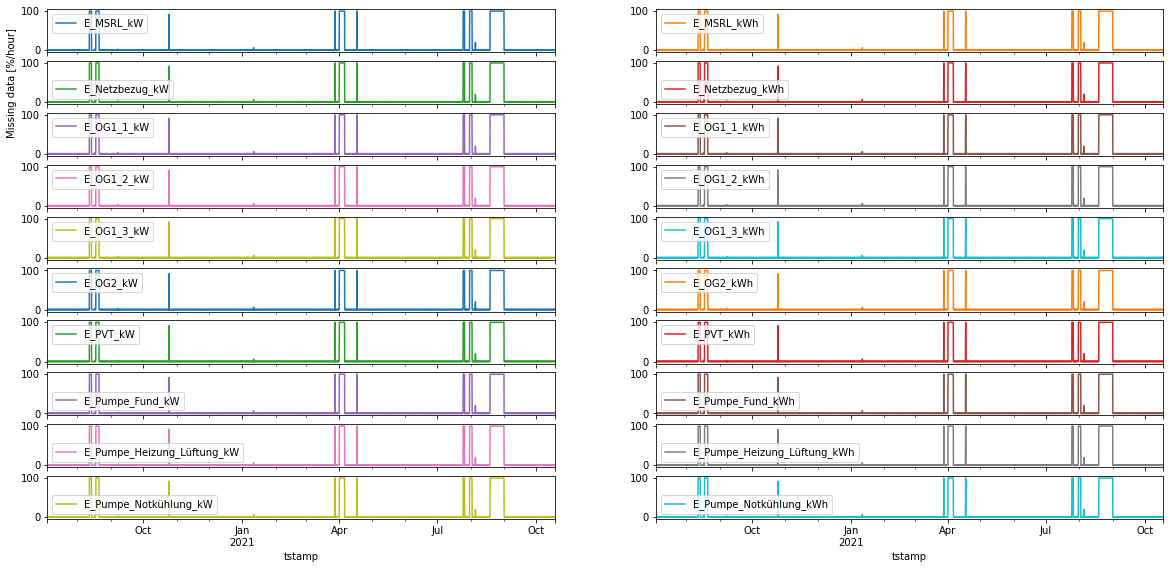

In [9]:
axes = data_oblamatik.iloc[:,20:40].isna().astype(float).resample('1h').sum().divide(60/100).plot(subplots=True, figsize=(20,80), rot=0,
                                                                                   layout=(int(np.ceil(data_oblamatik.shape[1]/2)),2))
axes[1,0].set_ylabel('Missing data [%/hour]')

## Longest sequence of NaNs

In [10]:
cols = data_oblamatik.columns[data_oblamatik.dtypes == 'float64']
longest_sequence = {}

for col in cols:
    longest_sequence[col] = check_consecutive_nan(data_oblamatik,col)
    
longest_sequence

{'Anergie_Kälte_kW': 18721,
 'Anergie_Kälte_kWh': 18721,
 'Anergie_Wärme_kW': 18721,
 'Anergie_Wärme_kWh': 18721,
 'E_Allgemein_kW': 18721,
 'E_Allgemein_kWh': 18721,
 'E_EG_1_kW': 18721,
 'E_EG_1_kWh': 18721,
 'E_EG_2_kW': 18721,
 'E_EG_2_kWh': 18721,
 'E_EG_3_kW': 18721,
 'E_EG_3_kWh': 18721,
 'E_HauptVerteilung_Einspeisung_kW': 18721,
 'E_HauptVerteilung_kW': 18721,
 'E_HauptVerteilung_kWh': 18721,
 'E_Lüftung_kW': 18721,
 'E_Lüftung_kWh': 18721,
 'E_MSRL_kW': 18721,
 'E_MSRL_kWh': 18721,
 'E_Netzbezug_kW': 18721,
 'E_Netzbezug_kWh': 18721,
 'E_OG1_1_kW': 18721,
 'E_OG1_1_kWh': 18721,
 'E_OG1_2_kW': 18721,
 'E_OG1_2_kWh': 18721,
 'E_OG1_3_kW': 18721,
 'E_OG1_3_kWh': 18721,
 'E_OG2_kW': 18721,
 'E_OG2_kWh': 18721,
 'E_PVT_kW': 18721,
 'E_PVT_kWh': 18721,
 'E_Pumpe_Fund_kW': 18721,
 'E_Pumpe_Fund_kWh': 18721,
 'E_Pumpe_Heizung_Lüftung_kW': 18721,
 'E_Pumpe_Heizung_Lüftung_kWh': 18721,
 'E_Pumpe_Notkühlung_kW': 18721,
 'E_Pumpe_Notkühlung_kWh': 18721,
 'E_Pumpe_PVT_kW': 18721,
 'E_Pump

## Number of negative entries

In [11]:
negative_columns = dict()

for col in cols:
    negative_columns[col] = sum(data_oblamatik.loc[:,col] < 0)
    
negative_columns

{'Anergie_Kälte_kW': 138653,
 'Anergie_Kälte_kWh': 0,
 'Anergie_Wärme_kW': 65255,
 'Anergie_Wärme_kWh': 0,
 'E_Allgemein_kW': 0,
 'E_Allgemein_kWh': 0,
 'E_EG_1_kW': 0,
 'E_EG_1_kWh': 0,
 'E_EG_2_kW': 0,
 'E_EG_2_kWh': 0,
 'E_EG_3_kW': 0,
 'E_EG_3_kWh': 0,
 'E_HauptVerteilung_Einspeisung_kW': 0,
 'E_HauptVerteilung_kW': 0,
 'E_HauptVerteilung_kWh': 0,
 'E_Lüftung_kW': 7114,
 'E_Lüftung_kWh': 0,
 'E_MSRL_kW': 0,
 'E_MSRL_kWh': 0,
 'E_Netzbezug_kW': 0,
 'E_Netzbezug_kWh': 0,
 'E_OG1_1_kW': 0,
 'E_OG1_1_kWh': 0,
 'E_OG1_2_kW': 0,
 'E_OG1_2_kWh': 0,
 'E_OG1_3_kW': 0,
 'E_OG1_3_kWh': 0,
 'E_OG2_kW': 0,
 'E_OG2_kWh': 0,
 'E_PVT_kW': 182774,
 'E_PVT_kWh': 54950,
 'E_Pumpe_Fund_kW': 0,
 'E_Pumpe_Fund_kWh': 0,
 'E_Pumpe_Heizung_Lüftung_kW': 0,
 'E_Pumpe_Heizung_Lüftung_kWh': 0,
 'E_Pumpe_Notkühlung_kW': 0,
 'E_Pumpe_Notkühlung_kWh': 0,
 'E_Pumpe_PVT_kW': 0,
 'E_Pumpe_PVT_kWh': 0,
 'E_Pumpe_Rückkühlung_kW': 0,
 'E_Pumpe_Rückkühlung_kWh': 0,
 'E_Stab_Speicher_kW': 0,
 'E_Stab_Speicher_kWh': 0,
 '

# Plausibility Check of Energy Data 

In [12]:
columns_kWh = [s for s in data_oblamatik.columns if s.endswith('kWh')]
columns_kW = [s for s in data_oblamatik.columns if np.logical_or(s.endswith('kW'), s.endswith('kW_neg'))]
columns_temperature = [s for s in data_oblamatik.columns if s.startswith('T_')] + \
    [s for s in data_oblamatik.columns if s.endswith('TRL')] + [s for s in data_oblamatik.columns if s.endswith('TVL')] + \
    [s for s in data_oblamatik.columns if s.endswith('Vol')] + [s for s in data_oblamatik.columns if s.endswith('Tin')] + \
    [s for s in data_oblamatik.columns if s.endswith('Tout')]
columns_kWh.remove("E_Netzbezug_kWh")

In [13]:
data_oblamatik["YearMonthHour"] = data_oblamatik.index.strftime('%Y%m%H')
data_ymh=data_oblamatik.groupby("YearMonthHour").mean()

In [14]:
for col in columns_kW + columns_temperature:
    data_oblamatik[col] = data_oblamatik[col].fillna(data_oblamatik.YearMonthHour.map(data_ymh[col].to_dict()))
del data_ymh

In [15]:
data_oblamatik["E_WP1_kWh"][data_oblamatik.index < data_oblamatik.index[np.diff(data_oblamatik["E_WP1_kWh"], prepend=0)<0][0]] = np.nan
data_oblamatik[columns_kWh].fillna(method='bfill', inplace=True)

for col in columns_kWh:
    data_oblamatik.loc[:,col] -= data_oblamatik[col][0]

count_outliers = check_limits_of_data(data_oblamatik)
index_prob, index_poss = tukeys_method(data_oblamatik, "E_PVT_kWh")
data_oblamatik["E_PVT_kWh"][index_prob] = np.nan
    
data_oblamatik[cols].interpolate(inplace=True)
data_oblamatik.fillna(method='ffill', inplace=True)
data_oblamatik.fillna(method='bfill', inplace=True)
data_oblamatik['E_OG1_3_kWh'][data_oblamatik.index >= data_oblamatik.index[np.diff(data_oblamatik['E_OG1_3_kWh'], prepend=0)>10**5][0]]-=data_oblamatik['E_OG1_3_kWh'][np.diff(data_oblamatik['E_OG1_3_kWh'], prepend=0)>10**5].values

In [16]:
data_oblamatik_kwh_monthly = get_monthly_data(data_oblamatik[columns_kWh])
for col in data_oblamatik_kwh_monthly.columns:
    data_oblamatik_kwh_monthly[col] = np.diff(data_oblamatik_kwh_monthly[col], prepend=0)

In [17]:
months = list()
for ind in data_oblamatik_kwh_monthly.index:
    months.append((ind.strftime("%Y"), ind.strftime("%b")))
data_oblamatik_kwh_monthly.index = months

In [18]:
approximated_kwh = dict()
for col in columns_kW:
    approximated_kwh[col] = calc_kwh_from_kw(data_oblamatik[col])

data_oblamatik_kwh_from_kw_monthly=pd.DataFrame(data=approximated_kwh, index=data_oblamatik_kwh_monthly.index)

In [19]:
columns=data_oblamatik_kwh_monthly.columns.str[:-4].to_list()
for col in columns:
    if col not in data_oblamatik_kwh_from_kw_monthly.columns.str[:-3]:
        columns.remove(col)

In [20]:
data_plausibility_test=pd.concat([data_oblamatik_kwh_monthly, data_oblamatik_kwh_from_kw_monthly], axis=1)
data_plausibility_test=data_plausibility_test.reindex(sorted(data_plausibility_test.columns), axis=1)

In [21]:
data_plausibility_test['x'] = months
data_plausibility_test

,Anergie_Kälte_kW,Anergie_Kälte_kWh,Anergie_Wärme_kW,Anergie_Wärme_kWh,E_Allgemein_kW,E_Allgemein_kWh,E_Bezug_EW_kWh,E_EG_1_kW,E_EG_1_kWh,E_EG_2_kW,E_EG_2_kWh,E_EG_3_kW,E_EG_3_kWh,E_HauptVerteilung_Einspeisung_kW,E_HauptVerteilung_Einspeisung_kWh,E_HauptVerteilung_kW,E_HauptVerteilung_kWh,E_Lüftung_kW,E_Lüftung_kWh,E_MSRL_kW,E_MSRL_kWh,E_Netzbezug_kW,E_OG1_1_kW,E_OG1_1_kWh,E_OG1_2_kW,E_OG1_2_kWh,E_OG1_3_kW,E_OG1_3_kWh,E_OG2_kW,E_OG2_kWh,E_PVT_kW,E_PVT_kWh,E_Pumpe_Fund_kW,E_Pumpe_Fund_kWh,E_Pumpe_Heizung_Lüftung_kW,E_Pumpe_Heizung_Lüftung_kWh,E_Pumpe_Notkühlung_kW,E_Pumpe_Notkühlung_kWh,E_Pumpe_PVT_kW,E_Pumpe_PVT_kWh,E_Pumpe_Rückkühlung_kW,E_Pumpe_Rückkühlung_kWh,E_Stab_Speicher_kW,E_Stab_Speicher_kWh,E_Technikraum_kW,E_Technikraum_kWh,E_USV_kW,E_USV_kWh,E_WP1_kW,E_WP1_kWh,E_WP2_kW,E_WP2_kWh,Fund_KälteReg_kW,Fund_KälteReg_kWh,Fund_WärmeReg_kW,Fund_WärmeReg_kWh,Gastro_Abw_kW,Gastro_Abw_kWh,Heizung_Deckensegel_FBH_kW,Heizung_Deckensegel_FBH_kWh,Heizung_Lüftung_kW,Heizung_Lüftung_kWh,Kühlung_Deckensegel_FBH_kW,Kühlung_Deckensegel_FBH_kWh,Kühlung_Lüftung_kW,Kühlung_Lüftung_kWh,Kühlung_Server_kW,Kühlung_Server_kWh,Notkühlung_Gastro_kW,Notkühlung_Gastro_kWh,PVT_BWW_kW,PVT_BWW_kWh,PVT_Kühlung_Fund_kW,PVT_Kühlung_Fund_kWh,PVT_Wärme_Fund_kW,PVT_Wärme_Fund_kWh,WP1_Kond_BWW_kW,WP1_Kond_BWW_kWh,WP1_Kond_kW,WP1_Kond_kWh,WP1_Verd_kW,WP1_Verd_kWh,WP2_Kond_kW,WP2_Kond_kWh,WP2_Verd_kW,WP2_Verd_kWh,WRG_Speicher_kW,WRG_Speicher_kW_neg,WRG_Speicher_kWh,x
"(2020, Jul)",91.269167,3.0,2.033452,2.0,20429.965848,18456.93750,NaN,6425.858466,5806.742188,1364.525324,1231.269531,846.916030,765.620117,864.445204,NaN,24258.004588,21131.06250,3969.485245,3624.0,8230.459159,7433.992188,1995.407942,194.865782,176.419922,2596.448323,2347.488281,0.000000,0.0000,700.804559,633.259766,0.000000,0.000000,0.000000,0.0,191.682145,173.6,33.869345,338.7,577.579728,518.3,44.250842,31.9,0.000000,0.0,1110.964250,7.680000e+02,2038.842699,1841.958984,19221.984329,NaN,5801.957755,5.238410e+03,5631.757834,3.0,17554.558120,16845.0,0.0,0.0,15.110655,14.0,169.581071,148.0,16796.548604,15159.0,1904.064942,1723.0,2293.011328,2072.0,1254.365867,1122.0,9.838810,9.0,23.779583,0.0,10649.076183,9597.0,1993.859545,1749.0,29060.943600,26173.0,85.977024,31.0,0.000000,0.0,0.000000,0.0,5372.444273,0.014762,4862.0,"(2020, Jul)"
"(2020, Aug)",330.058333,2.0,0.000000,0.0,19074.594468,20059.90625,NaN,5467.621146,5814.976562,1263.480002,1366.169922,829.837066,844.830078,593.737456,NaN,26471.974975,27295.34375,4056.853536,4279.5,8276.768413,8578.570312,1995.407942,181.150412,194.590088,2442.989522,2577.589844,0.000000,0.0000,716.926279,771.450195,0.000000,0.000000,0.000000,0.0,208.650357,210.1,89.303788,485.0,371.254257,374.6,38.450654,44.8,0.000000,0.0,847.271937,0.000000e+00,2031.207533,2033.390625,19221.984329,NaN,6704.869768,7.015773e+03,6545.272274,463.0,13547.431732,14874.0,0.0,0.0,43.910285,37.0,1486.991653,1484.0,15471.864393,15744.0,2095.894570,2294.0,2305.189607,2286.0,1253.831585,1282.0,1434.416853,1249.0,38.342628,0.0,13291.689335,13188.0,1823.418846,1853.0,33639.776764,35154.0,40.983333,18.0,0.000000,0.0,0.000000,0.0,4971.916384,1.267821,5193.0,"(2020, Aug)"
"(2020, Sep)",0.000000,0.0,0.000000,0.0,21936.430288,21940.90625,NaN,6387.119989,6392.171875,1541.400840,1539.890625,818.150531,816.450195,379.420029,NaN,25549.137633,25169.03125,3527.241672,3562.5,6449.706044,6449.679688,1931.039944,202.811458,203.269775,2620.654520,2621.578125,0.000000,0.0000,1105.451920,1106.450195,0.000000,0.000000,0.006667,0.2,89.823120,94.4,38.013623,358.7,96.639891,85.6,23.669727,31.4,0.000000,0.0,213.432127,0.000000e+00,1980.714895,1981.410156,18601.920319,NaN,4295.404785,4.293750e+03,1923.790412,573.0,9002.341138,9760.0,0.0,0.0,564.412162,566.0,675.238977,672.0,9218.372732,9201.0,1048.661903,1047.0,2120.853347,2121.0,1094.183591,1086.0,801.776639,799.0,110.863780,0.0,6286.215950,6296.0,1329.144729,1304.0,21552.113459,21489.0,56.188333,8.0,0.000000,0.0,0.000000,0.0,3048.878854,22.686667,3047.0,"(2020, Sep)"

In [22]:
source = ColumnDataSource(data=data_plausibility_test)

In [23]:
output_notebook()
@interact
def thermisch_bar_chart_yearly(Parameter=columns):
    p_kw = Parameter+'_kW'
    p_kwh = Parameter+'_kWh'
    plot = figure(x_range=FactorRange(*data_plausibility_test.loc[:,'x']), width=980, plot_height=300, 
                  tools="box_zoom,reset")
    p1=plot.vbar(x=dodge('x', -0.15, range=plot.x_range), top=p_kw, width=0.2, 
                 source=ColumnDataSource(data=data_plausibility_test), color="navy", legend_label='Calculated')
    p2=plot.vbar(x=dodge('x', 0.15, range=plot.x_range), top=p_kwh, width=0.2, 
                 source=ColumnDataSource(data=data_plausibility_test), color="indianred", legend_label='Measured')
    plot.line(x=data_plausibility_test.loc[:,'x'], y=abs(source.data[p_kw] - source.data[p_kwh]), color='silver', 
              line_width=5, line_alpha=0.5, legend_label='Difference')
    plot.xgrid.grid_line_color = None
    plot.xaxis.major_label_orientation = 1
    plot.x_range.range_padding = 0.1
    plot.legend.orientation = "horizontal"
    plot.legend.location = "top_center"
    plot.yaxis.axis_label = "Energiebedarf [kWh]"
    plot.add_tools(HoverTool(renderers=[p1],tooltips=[("Berechnet", "@"+p_kw+'{int}')]))
    plot.add_tools(HoverTool(renderers=[p2],tooltips=[("Gemessen", "@"+p_kwh+'{int}')]))
    plot.add_layout(plot.legend[0], 'above')
    show(plot)

Loading BokehJS ...

interactive(children=(Dropdown(description='Parameter', options=('Anergie_Kälte', 'Anergie_Wärme', 'E_Allgemei…

# Comparison with Weather Data

In [ ]:
path = r"C:\Users\severin.stolz\Desktop\Oblamatik_Data_Skripts\order_97270_data.txt"
weather_data = pd.read_csv(filepath_or_buffer=path, delimiter=';', header=0, names=['tstamp', 'Diffusstrahlung', 
                                                                                    'Globalstrahlung',
                                                                                    'Lufttemperatur', 
                                                                                    'Niederschlag',
                                                                                    'Relative Luftfeuchtigkeit', 
                                                                                    'Windgeschwindigkeit m/s',
                                                                                   'Windgeschwindigkeit km/h',
                                                                                   'Windrichtung',
                                                                                   'Schneehöhe'],
                usecols=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], low_memory=False, na_values='-')
weather_data['tstamp'] = pd.to_datetime(weather_data['tstamp'], format='%Y%m%d%H')
weather_data.set_index('tstamp', inplace=True)
weather_data

In [ ]:
globalstrahlung_data_oblamatik = data_oblamatik["Globalstrahlung"].fillna(method='ffill').resample('H').mean()
globalstrahlung_weather_data = weather_data.loc[weather_data.index >= globalstrahlung_data_oblamatik.index[0], 'Globalstrahlung']
globalstrahlung_data_oblamatik = globalstrahlung_data_oblamatik.loc[globalstrahlung_data_oblamatik.index <= globalstrahlung_weather_data.index[-1]]

globalstrahlung_diff = globalstrahlung_data_oblamatik[globalstrahlung_data_oblamatik.notnull()] - globalstrahlung_weather_data[globalstrahlung_data_oblamatik.notnull()]
globalstrahlung_diff_per_hour = dict()
globalstrahlung_diff_count = dict()
for ind in globalstrahlung_diff.index:
    globalstrahlung_diff_per_hour[ind.hour] = globalstrahlung_diff_per_hour.get(ind.hour,0) + abs(globalstrahlung_diff[ind])
    globalstrahlung_diff_count[ind.hour] = globalstrahlung_diff_count.get(ind.hour,0) + 1

for key in globalstrahlung_diff_per_hour.keys():
    globalstrahlung_diff_per_hour[key] /= globalstrahlung_diff_count[key]

In [ ]:
lower = '2021-05-01'
upper = '2021-06-01'
globalstrahlung_data_oblamatik[np.logical_and(lower<=globalstrahlung_data_oblamatik.index, globalstrahlung_data_oblamatik.index<=upper)].plot(figsize=(15,4.8), linewidth=3)
globalstrahlung_weather_data[np.logical_and(lower<=globalstrahlung_weather_data.index, globalstrahlung_weather_data.index<=upper)].plot(figsize=(15,4.8), linestyle='dashed')
matplotlib.pyplot.show()

In [ ]:
fig, ax = matplotlib.pyplot.subplots(nrows=3, ncols=1, sharex=True, figsize=(20,15))
ax[0].plot(globalstrahlung_data_oblamatik)
ax[0].set_ylabel("Data Oblamatik")
ax[1].plot(globalstrahlung_weather_data)
ax[1].set_ylabel("Weather Data")
ax[2].plot(globalstrahlung_diff)
ax[2].set_ylabel("Oblamatik - Weather")